<h2>Base model evaluation</h2>

This model used is RoBERTa that is further trained on BoolQ dataset.
our evalution citeria is accuracy and f-score of the model and confusion matrix to visualize claasfication patterns.
Both auto-generated and manually generated questions are tested.

it can be optianed from https://pypi.org/project/boolean-question/

In [1]:
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from boolean_question import BoolQ

C:\Users\Mohammed\Anaconda3\envs\robo2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get questions from dataset

In [2]:
# Read CSV file into DataFrame df
df = pd.read_csv('../data/generatedQuestions200.csv', header=0)
df.head()

,Recipe,Question,label
0,Stir together brown sugar and hot water in a c...,Does the orange twist in a cocktail shaker work?,0
1,Place 2 chamomile tea bags in a heatsafe vesse...,Do you make chamomile tea with tea leaves?,0
2,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",Is 1 oz. grand marnier the same as 1 12 tsp?,0
3,Heat oil in a large nonstick skillet over medi...,Are there any fruit in a mango smoothie?,0
4,"In a large heavy kettle cook garlic, onions, c...",Do you make the shrimp sauce in the kimchi?,0


In [3]:
# dataset example
Recipes = list(df["Recipe"]) 
print(Recipes[0])
print()
Questions = list(df["Question"])
labels = list(df["label"])
print(Questions[0], ", answer: ",labels[0])


print("total rows: ", len(Recipes))

Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bourbon, lemon juice, and apple butter and fill with ice. Shake until well chilled, about 15 seconds. Strain into an ice-filled rocks glass. Garnish with orange twist and cinnamon.

Does the orange twist in a cocktail shaker work? , answer:  0
total rows:  200


# Evaluate the base model

# boolean_question libary

In [6]:
y_true = []
y_pred = []

bq = BoolQ()
tested = 0

# Predict the answer from the passage and the question
for i in range(len(Recipes)):
    #answer the Q
    tested +=1
    ans = bq.predict(passage=Recipes[i], question=Questions[i])
    
    pred = ""
    if (ans):
        pred = 1
    else:
        pred = 0

#     y_true.append(labels[i])
    y_pred.append(pred)      
 

print("Done... ", tested)
print("len true: ", len(labels))
print("len pred: ", len(y_pred))

Some weights of the model checkpoint at C:\Users\Mohammed\Anaconda3\envs\robo2\lib\site-packages\boolean_question\model were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Done...  200
len true:  200
len pred:  200


acc:  0.555

[[18.5 31.5]
 [13.  37. ]]


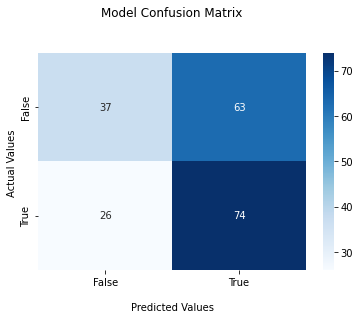

0.539230151950506
0.555
0.539230151950506


In [7]:
acc = 0
for i in range(len(labels)):
    if(labels[i] == y_pred[i]):
        acc +=1
print("acc: ", acc/len(labels))
print()
cf_matrix = confusion_matrix(labels, y_pred)
print((cf_matrix/np.sum(cf_matrix)*100))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(f1_score(labels, y_pred, average='macro',zero_division=1))
print(f1_score(labels, y_pred, average='micro',zero_division=1))
print(f1_score(labels, y_pred, average='weighted',zero_division=1))


# test on manually Generated Questions

In [9]:
df = pd.read_csv('../data/manuallyGeneratedQuestions.csv', header=0)
df.head()

,Recipe,Question,label
0,"Blend flour, sugar, and salt in processor unti...",is wine needed in this recipe,1
1,"Blend flour, sugar, and salt in processor unti...",Is the dough baked for 5 minutes?,0
2,"Mix salt, 3 tablespoons sugar, and pepper in s...",Are pork crosswise cut into thin slices?,1
3,"Mix salt, 3 tablespoons sugar, and pepper in s...",is the pork coated with sugar,0
4,"Combine berries in a large bowl. Heat wine, cr...",Are the strips fired unilt golden?,1


In [ ]:
# dataset example
Recipes = list(df["Recipe"]) 
print(Recipes[0])
print()
Questions = list(df["Question"])
labels = list(df["label"])
print(Questions[0], ", answer: ",labels[0])


print("total rows: ", len(Recipes))

In [10]:
y_true = []
y_pred = []

bq = BoolQ()
tested = 0

# Predict the answer from the passage and the question
for i in range(len(Recipes)):
    #answer the Q
    tested +=1
    try:
        ans = bq.predict(passage=Recipes[i], question=Questions[i])
    
        pred = ""
        if (ans):
            pred = 1
        else:
            pred = 0

        y_pred.append(pred)
    
    except:
        print(i)
 

print("Done... ", tested)
print("len true: ", len(labels))
print("len pred: ", len(y_pred))

Some weights of the model checkpoint at C:\Users\Mohammed\Anaconda3\envs\robo2\lib\site-packages\boolean_question\model were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Done...  200
len true:  200
len pred:  200


acc:  0.555

[[18.5 31.5]
 [13.  37. ]]


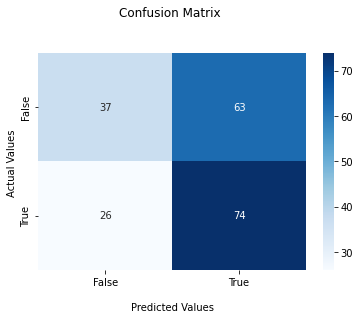

0.539230151950506
0.555
0.539230151950506


In [11]:
acc = 0
for i in range(len(labels)):
    if(labels[i] == y_pred[i]):
        acc +=1
print("acc: ", acc/len(labels))
print()

cf_matrix = confusion_matrix(labels, y_pred)
print((cf_matrix/np.sum(cf_matrix)*100))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(f1_score(labels, y_pred, average='macro',zero_division=1))
print(f1_score(labels, y_pred, average='micro',zero_division=1))
print(f1_score(labels, y_pred, average='weighted',zero_division=1))
